## Evaluating simple linear regressions on lemonade data with other features:

1. Create a dataframe from the csv at https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv

In [1]:
from pydataset import data
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.formula.api import ols

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")
df.head()

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18


Make a baseline for predicting sales. (The mean is a good baseline)

In [3]:
baseline = df.sales.mean()

baseline

25.323287671232876

Create a new dataframe to hold residuals.

In [4]:
residuals = pd.DataFrame()

Calculate the baseline residuals.

In [5]:
residuals['x'] = df.flyers
residuals["y"] = df.sales

residuals["baseline"] = baseline

residuals["baseline_residual"] = residuals.baseline - residuals.y
residuals.head()

,x,y,baseline,baseline_residual
0,15,10,25.323288,15.323288
1,15,13,25.323288,12.323288
2,27,15,25.323288,10.323288
3,28,17,25.323288,8.323288
4,33,18,25.323288,7.323288


Use ols from statsmodels to create a simple linear regression (1 independent variable, 1 dependent variable) to predict sales using flyers.

In [6]:
model = ols('sales ~ flyers', data=df).fit()

Use the .predict method from ols to produce all of our predictions. Add these predictions to the data

In [7]:
residuals["yhat"] = model.predict()
residuals.head()

,x,y,baseline,baseline_residual,yhat
0,15,10,25.323288,15.323288,14.673754
1,15,13,25.323288,12.323288,14.673754
2,27,15,25.323288,10.323288,19.727926
3,28,17,25.323288,8.323288,20.149107
4,33,18,25.323288,7.323288,22.255013


Calculate that model's residuals.

In [8]:
residuals["yhat_residuals"] = residuals.yhat - residuals.y
residuals.head()

,x,y,baseline,baseline_residual,yhat,yhat_residuals
0,15,10,25.323288,15.323288,14.673754,4.673754
1,15,13,25.323288,12.323288,14.673754,1.673754
2,27,15,25.323288,10.323288,19.727926,4.727926
3,28,17,25.323288,8.323288,20.149107,3.149107
4,33,18,25.323288,7.323288,22.255013,4.255013


Evaluate that model's performance and answer if the model is significant.

In [9]:
baseline_sse = (residuals.baseline_residual**2).sum()
flyer_model_sse = (residuals.yhat_residuals**2).sum()

In [10]:
if flyer_model_sse < baseline_sse:
    print("Our model beats the baseline")
else:
    print("Our baseline is better than the model.")

print("\nBaseline SSE", baseline_sse)
print("\nModel SSE", flyer_model_sse)

Our model beats the baseline

Baseline SSE 17297.85205479452

Model SSE 6083.326244705024


In [11]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.648


In [12]:
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  2.193718738113383e-84


__Since p value is less than alpha (.05), we reject the null hypothesis. Our model is significant.__

Evaluate that model's performance and answer if the feature is significant.

__The feature is significant since it is the only feature used__

## Repetition Improves Performance!

In the next section of your notebook, perform the steps above with the rainfall column as the model's feature. 

In [13]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")

baseline = df.sales.mean()

residuals = pd.DataFrame()

residuals['x'] = df.rainfall
residuals["y"] = df.sales

residuals["baseline"] = baseline

residuals["baseline_residual"] = residuals.baseline - residuals.y

model = ols('sales ~ rainfall', data=df).fit()

residuals["yhat"] = model.predict()

residuals["yhat_residuals"] = residuals.yhat - residuals.y

residuals.head()

,x,y,baseline,baseline_residual,yhat,yhat_residuals
0,2.00,10,25.323288,15.323288,-1.599602,-11.599602
1,1.33,13,25.323288,12.323288,13.773142,0.773142
2,1.33,15,25.323288,10.323288,13.773142,-1.226858
3,1.05,17,25.323288,8.323288,20.197573,3.197573
4,1.00,18,25.323288,7.323288,21.344793,3.344793


Does this model beat the baseline? 

In [14]:
baseline_sse = (residuals.baseline_residual**2).sum()
rainfall_model_sse = (residuals.yhat_residuals**2).sum()

In [15]:
if rainfall_model_sse < baseline_sse:
    print("Our model beats the baseline")
else:
    print("Our baseline is better than the model.")

print("\nBaseline SSE", baseline_sse)
print("\nModel SSE", rainfall_model_sse)

Our model beats the baseline

Baseline SSE 17297.85205479452

Model SSE 2998.2371310300655


In [16]:
r2 = model.rsquared

f_pval = model.f_pvalue

print('R-squared = ', round(r2,3))
print("p-value for model significance = ", f_pval)

R-squared =  0.827
p-value for model significance =  3.2988846597381e-140


__Since p value is less than alpha (.05), we reject the null hypothesis. Our model is significant.__

Would you prefer the rainfall model over the flyers model?

__This is a better model than the flyers model__

In the next section of your notebook, perform the steps above with the log_rainfall column as the model's feature. 

In [17]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")

df["log_rainfall"] = np.log(df.rainfall)

baseline = df.sales.mean()

residuals = pd.DataFrame()

residuals['x'] = df.log_rainfall
residuals["y"] = df.sales

residuals["baseline"] = baseline

residuals["baseline_residual"] = residuals.baseline - residuals.y

model = ols('sales ~ log_rainfall', data=df).fit()

residuals["yhat"] = model.predict()

residuals["yhat_residuals"] = residuals.yhat - residuals.y

residuals.head()

,x,y,baseline,baseline_residual,yhat,yhat_residuals
0,0.693147,10,25.323288,15.323288,3.688573,-6.311427
1,0.285179,13,25.323288,12.323288,13.198359,0.198359
2,0.285179,15,25.323288,10.323288,13.198359,-1.801641
3,0.048790,17,25.323288,8.323288,18.708608,1.708608
4,0.000000,18,25.323288,7.323288,19.845912,1.845912


Does this model beat the baseline? 

In [18]:
baseline_sse = (residuals.baseline_residual**2).sum()
rainfall_log_model_sse = (residuals.yhat_residuals**2).sum()

In [19]:
if rainfall_log_model_sse < baseline_sse:
    print("Our model beats the baseline")
else:
    print("Our baseline is better than the model.")

print("\nBaseline SSE", baseline_sse)
print("\nModel SSE", rainfall_log_model_sse)

Our model beats the baseline

Baseline SSE 17297.85205479452

Model SSE 952.3253474293448


In [20]:
r2 = model.rsquared

f_pval = model.f_pvalue

print('R-squared = ', round(r2,3))
print("p-value for model significance = ", f_pval)

R-squared =  0.945
p-value for model significance =  1.2242624097795882e-230


Would you prefer the log_rainfall model over the flyers model? 

In [22]:
print(f'Rainfall log model SSE: {rainfall_log_model_sse}')
print(f'Flyer model SSE: {flyer_model_sse}')

Rainfall log model SSE: 952.3253474293448
Flyer model SSE: 6083.326244705024


**I would prefer to use the log_rainfall model over the flyer model**

Would you prefer the model built with log_rainfall over the rainfall model from before?

In [21]:
print(f'Rainfall log model SSE: {rainfall_log_model_sse}')
print(f'Rainfall model SSE: {rainfall_model_sse}')

Rainfall log model SSE: 952.3253474293448
Rainfall model SSE: 2998.2371310300655


**I would prefer the log_rainfall model over the rainfall model**

In the next section of your notebook, perform the steps above with the temperature column as the model's only feature. 

In [23]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")

baseline = df.sales.mean()

residuals = pd.DataFrame()

residuals['x'] = df.temperature
residuals["y"] = df.sales

residuals["baseline"] = baseline

residuals["baseline_residual"] = residuals.baseline - residuals.y

model = ols('sales ~ temperature', data=df).fit()

residuals["yhat"] = model.predict()

residuals["yhat_residuals"] = residuals.yhat - residuals.y

residuals.head()

,x,y,baseline,baseline_residual,yhat,yhat_residuals
0,27.0,10,25.323288,15.323288,11.112301,1.112301
1,28.9,13,25.323288,12.323288,11.912772,-1.087228
2,34.5,15,25.323288,10.323288,14.272055,-0.727945
3,44.1,17,25.323288,8.323288,18.316540,1.316540
4,42.4,18,25.323288,7.323288,17.600329,-0.399671


Does this model beat the baseline? 

In [24]:
baseline_sse = (residuals.baseline_residual**2).sum()
temperature_model_sse = (residuals.yhat_residuals**2).sum()

In [25]:
if temperature_model_sse < baseline_sse:
    print("Our model beats the baseline")
else:
    print("Our baseline is better than the model.")

print("\nBaseline SSE", baseline_sse)
print("\nModel SSE", temperature_model_sse)

Our model beats the baseline

Baseline SSE 17297.85205479452

Model SSE 349.977815203168


In [27]:
r2 = model.rsquared

f_pval = model.f_pvalue

print('R-squared = ', round(r2,3))
print("p-value for model significance = ", f_pval)

R-squared =  0.98
p-value for model significance =  1.492364042585725e-309


**Since p value is less than alpha (.05), we reject the null hypothesis. Our model is significant.**

Would you prefer the rainfall, log_rainfall, or the flyers model?

In [28]:
print(f'Rainfall log model SSE: {rainfall_log_model_sse}')
print(f'Rainfall model SSE: {rainfall_model_sse}')
print(f'Flyer model SSE: {flyer_model_sse}')

Rainfall log model SSE: 952.3253474293448
Rainfall model SSE: 2998.2371310300655
Flyer model SSE: 6083.326244705024


**I would prefer to use the log_rainfall model**

Which of these 4 single regression models would you want to move forward with?

In [29]:
print(f'Rainfall log model SSE: {rainfall_log_model_sse}')
print(f'Rainfall model SSE: {rainfall_model_sse}')
print(f'Flyer model SSE: {flyer_model_sse}')
print(f'Temperature model SSE: {temperature_model_sse}')

Rainfall log model SSE: 952.3253474293448
Rainfall model SSE: 2998.2371310300655
Flyer model SSE: 6083.326244705024
Temperature model SSE: 349.977815203168


**I would prefer to use the temperature model**

## Tips dataset

Load the tips dataset from pydataset or seaborn

In [30]:
df = sns.load_dataset("tips")

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill.

In [32]:
baseline = df.tip.mean()

baseline

2.9982786885245902

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [33]:
residuals = pd.DataFrame()

residuals['x'] = df.total_bill
residuals["y"] = df.tip

residuals["baseline"] = baseline

residuals["baseline_residual"] = residuals.baseline - residuals.y

model = ols('tip ~ total_bill', data=df).fit()

residuals["yhat"] = model.predict()

residuals["yhat_residuals"] = residuals.yhat - residuals.y

residuals.head()

,x,y,baseline,baseline_residual,yhat,yhat_residuals
0,16.99,1.01,2.998279,1.988279,2.704636,1.694636
1,10.34,1.66,2.998279,1.338279,2.006223,0.346223
2,21.01,3.50,2.998279,-0.501721,3.126835,-0.373165
3,23.68,3.31,2.998279,-0.311721,3.407250,0.097250
4,24.59,3.61,2.998279,-0.611721,3.502822,-0.107178


Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [34]:
# sum of squared errors
model_sse = (residuals.yhat_residuals**2).sum()

# explained sum of squares
model_ess = sum((residuals.yhat - residuals.y.mean())**2)

# total sum of squares
model_tss = model_ess + model_sse

# calculating mean squared error
model_mse = mean_squared_error(residuals.y, residuals.yhat)

# calculating square root of sum of errors
model_rmse = sqrt(model_mse)

print(f'Model SSE (sum of squared errors) = {model_sse}')
print(f'Model ESS (explained sum of squares) = {model_ess}')
print(f'Model TSS (explained total sum of squares) = {model_tss}')
print(f'Model MSE (mean squared error) = {model_mse}')
print(f'Model RMSE (root mean squared error) = {model_rmse}')

Model SSE (sum of squared errors) = 252.788743850776
Model ESS (explained sum of squares) = 212.4237331984042
Model TSS (explained total sum of squares) = 465.21247704918017
Model MSE (mean squared error) = 1.036019442011377
Model RMSE (root mean squared error) = 1.0178504025697377


Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [35]:
baseline_sse = (residuals.baseline_residual**2).sum()

baseline_mse = mean_squared_error(residuals.y, residuals.baseline)

baseline_rmse = sqrt(baseline_mse)

print(f'baseline SSE (sum of squared errors) = {baseline_sse}')
print(f'baseline MSE (mean squared error) = {baseline_mse}')
print(f'baseline RMSE (root mean squared error) = {baseline_rmse}')

baseline SSE (sum of squared errors) = 465.2124770491804
baseline MSE (mean squared error) = 1.906608512496641
baseline RMSE (root mean squared error) = 1.3807999538298954


Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [37]:
if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("\nBaseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.

Baseline SSE 465.2124770491804
Model SSE 252.788743850776


Is your model significantly better than the baseline model?

**The model is significantly better than the baseline model**

Plot the residuals for the linear regression model that you made.

In [38]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

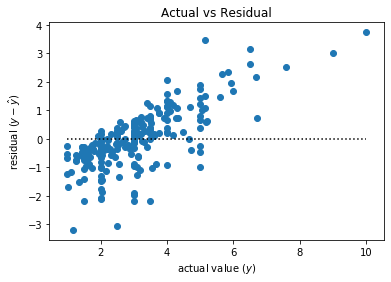

In [39]:
plot_residuals(residuals.y, residuals.yhat)
plt.show()